# Базовое решение Задачи 3

В современном мире существуют множество различных устройств (фитнес-браслетов, камер, датчиков и т.д.), которые собирают данные об активности пользователя. Эти сведения могут быть использованы, например, для отслеживания состояния здоровья человека и определение находится ли он сейчас в безопасности, что он делает и так далее.

Данные, собранные с носимых устройств, которые отслеживают физическую активность пользователей, используются во множестве коммерческих приложений, включая здравоохранение, фитнес-тренировки, навигационную систему и так далее.

В данной задаче вам предлагается, используя информацию, собранную с помощью трех Инерциальных измерительных модуля (IMU) и пульсометра.

**Датасет содержит по 54 столбца на строку, столбцы содержат следующие данные:**
- 1 временная метка (с)
- 2 частота сердечных сокращений (уд/мин)
- 3-19 данные с датчиков на руке
- 20-36 данные с датчиков на груди
- 37-53 данные с датчиков на лодыжкн

**Сенсорные данные IMU содержат следующие столбцы:**
- 1 температура (°C)
- 2-4 Данные 3D-ускорения (мс-2), масштаб: ±16g, разрешение: 13 бит
- 5-7 Данные 3D-ускорения (мс-2), масштаб: ±6g, разрешение: 13 бит*
- 8-10 данных 3D-гироскопа (рад/с)
- 11-13 Данные 3D-магнитометра (мкТл)

In [1]:
# иморитирование всех необходимых библиотек
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Physical_Activity_Monitoring_unlabeled.csv")

df.head()

,timestamp,handTemperature,handAcc16_1,handAcc16_2,handAcc16_3,handAcc6_1,handAcc6_2,handAcc6_3,handGyro1,handGyro2,...,ankleGyro2,ankleGyro3,ankleMagne1,ankleMagne2,ankleMagne3,ankleOrientation1,ankleOrientation2,ankleOrientation3,ankleOrientation4,subject_id
0,252.75,34.8750,0.902847,7.45872,6.032490,1.006100,7.44575,6.303650,-0.021952,0.004114,...,-0.025606,0.030239,-14.5447,27.3336,-5.76620,0.206416,0.348212,0.763201,-0.503652,5
1,3652.45,29.7500,-4.069330,3.76168,8.279720,-5.972500,3.22273,6.908970,0.116054,-0.375968,...,-0.670163,1.786200,-32.8257,-15.7719,-1.31395,0.578332,-0.566734,0.405888,-0.423791,2
2,504.76,34.3750,-2.007540,-9.60180,0.773674,-1.803500,-9.58937,1.073680,0.020131,0.042189,...,-0.009741,-0.006579,-18.8171,16.3089,25.29280,0.139776,0.676586,0.393796,0.606316,8
3,2801.61,31.9375,-13.262200,5.85443,0.899334,-13.611500,5.91511,0.840377,1.715630,-0.050492,...,-0.163470,-3.495570,-26.7418,34.3566,21.32740,0.416303,0.783387,0.306464,0.345075,2
4,441.01,33.5000,-0.013940,8.66540,4.398210,0.144153,8.56816,4.822200,-0.006938,-0.007383,...,-0.028172,-0.003737,-17.7798,-3.9981,10.99500,0.171133,-0.748343,0.252988,-0.588807,6


In [3]:
df.columns

Index(['timestamp', 'handTemperature', 'handAcc16_1', 'handAcc16_2',
       'handAcc16_3', 'handAcc6_1', 'handAcc6_2', 'handAcc6_3', 'handGyro1',
       'handGyro2', 'handGyro3', 'handMagne1', 'handMagne2', 'handMagne3',
       'handOrientation1', 'handOrientation2', 'handOrientation3',
       'handOrientation4', 'chestTemperature', 'chestAcc16_1', 'chestAcc16_2',
       'chestAcc16_3', 'chestAcc6_1', 'chestAcc6_2', 'chestAcc6_3',
       'chestGyro1', 'chestGyro2', 'chestGyro3', 'chestMagne1', 'chestMagne2',
       'chestMagne3', 'chestOrientation1', 'chestOrientation2',
       'chestOrientation3', 'chestOrientation4', 'ankleTemperature',
       'ankleAcc16_1', 'ankleAcc16_2', 'ankleAcc16_3', 'ankleAcc6_1',
       'ankleAcc6_2', 'ankleAcc6_3', 'ankleGyro1', 'ankleGyro2', 'ankleGyro3',
       'ankleMagne1', 'ankleMagne2', 'ankleMagne3', 'ankleOrientation1',
       'ankleOrientation2', 'ankleOrientation3', 'ankleOrientation4',
       'subject_id'],
      dtype='object')

## Исследование данных

Прежде чем переходить к непосредственному построению модели, в первую очередь необходимо исследовать имеющихся у вас набор данных:
1. Какую задачу вы решаете (классификация, регрессия) и какая переменная является целевой?
2. Сколько переменных в данных и какого они типа?
3. Имеются ли в данных пропуски?

In [4]:
df.shape

(534601, 53)

In [5]:
df.dtypes

timestamp            float64
handTemperature      float64
handAcc16_1          float64
handAcc16_2          float64
handAcc16_3          float64
handAcc6_1           float64
handAcc6_2           float64
handAcc6_3           float64
handGyro1            float64
handGyro2            float64
handGyro3            float64
handMagne1           float64
handMagne2           float64
handMagne3           float64
handOrientation1     float64
handOrientation2     float64
handOrientation3     float64
handOrientation4     float64
chestTemperature     float64
chestAcc16_1         float64
chestAcc16_2         float64
chestAcc16_3         float64
chestAcc6_1          float64
chestAcc6_2          float64
chestAcc6_3          float64
chestGyro1           float64
chestGyro2           float64
chestGyro3           float64
chestMagne1          float64
chestMagne2          float64
chestMagne3          float64
chestOrientation1    float64
chestOrientation2    float64
chestOrientation3    float64
chestOrientati

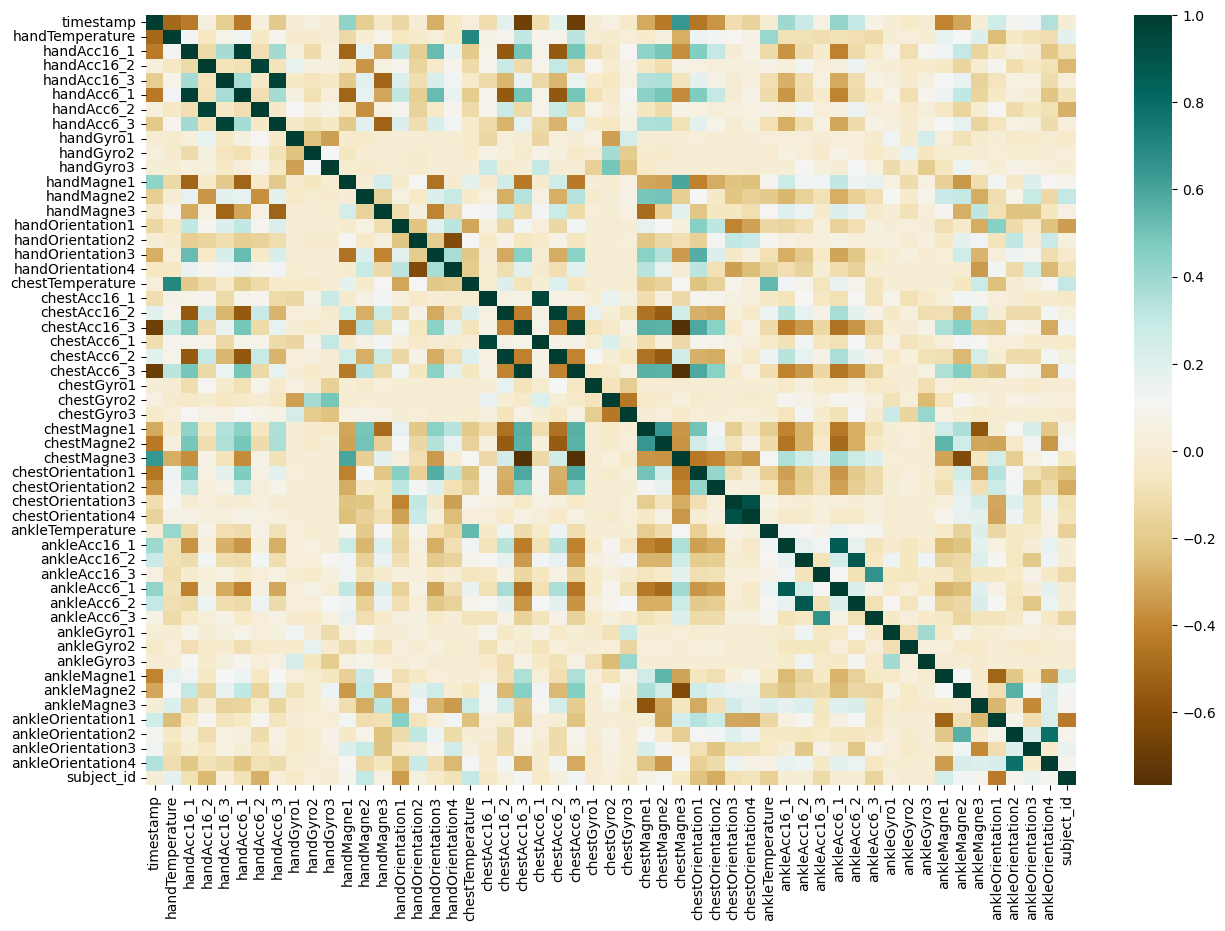

In [6]:
from pandas.plotting import scatter_matrix
import seaborn as sns
import numpy as np

df_corr = df.corr()

f, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(df_corr, cmap = "BrBG",ax=ax)
plt.show()

In [7]:
df.isna().sum()

timestamp               0
handTemperature      4041
handAcc16_1          4041
handAcc16_2          4041
handAcc16_3          4041
handAcc6_1           4041
handAcc6_2           4041
handAcc6_3           4041
handGyro1            4041
handGyro2            4041
handGyro3            4041
handMagne1           4041
handMagne2           4041
handMagne3           4041
handOrientation1     4041
handOrientation2     4041
handOrientation3     4041
handOrientation4     4041
chestTemperature      809
chestAcc16_1          809
chestAcc16_2          809
chestAcc16_3          809
chestAcc6_1           809
chestAcc6_2           809
chestAcc6_3           809
chestGyro1            809
chestGyro2            809
chestGyro3            809
chestMagne1           809
chestMagne2           809
chestMagne3           809
chestOrientation1     809
chestOrientation2     809
chestOrientation3     809
chestOrientation4     809
ankleTemperature     2546
ankleAcc16_1         2546
ankleAcc16_2         2546
ankleAcc16_3

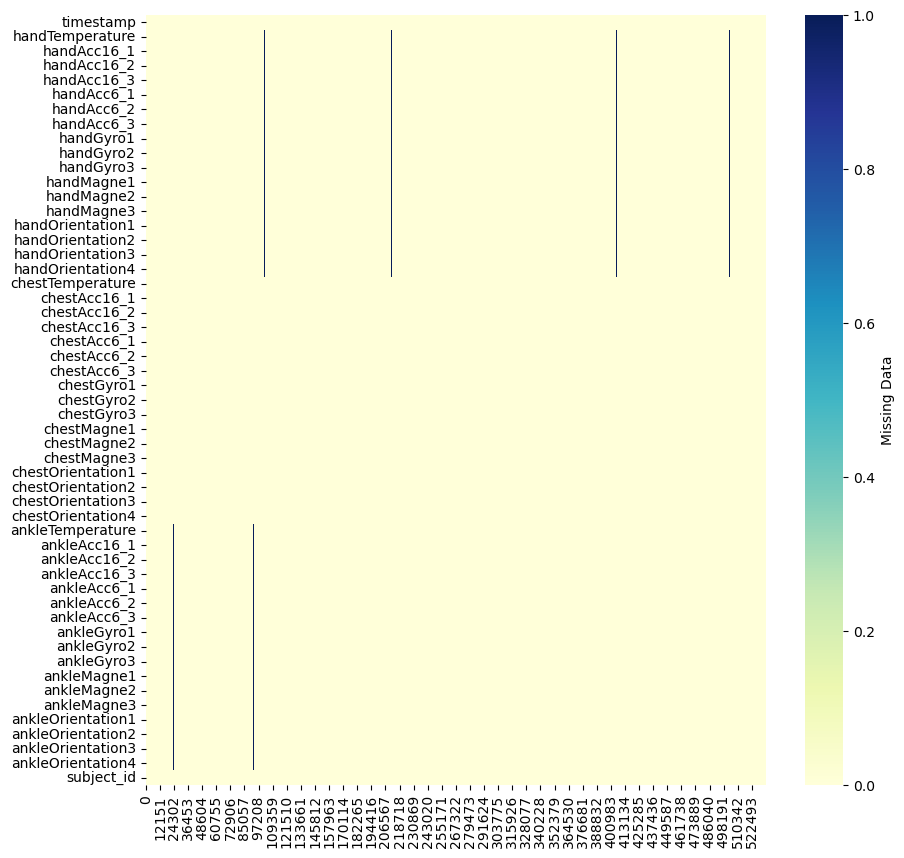

In [8]:
plt.figure(figsize=(10,10))
sns.heatmap(df.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})
plt.savefig("visualizing_missing_data_with_heatmap_Seaborn_Python.png", dpi=100)

**Библиотека визуализации пропусков:**

`pip install missingno`

In [9]:
import missingno as msno

<AxesSubplot:>

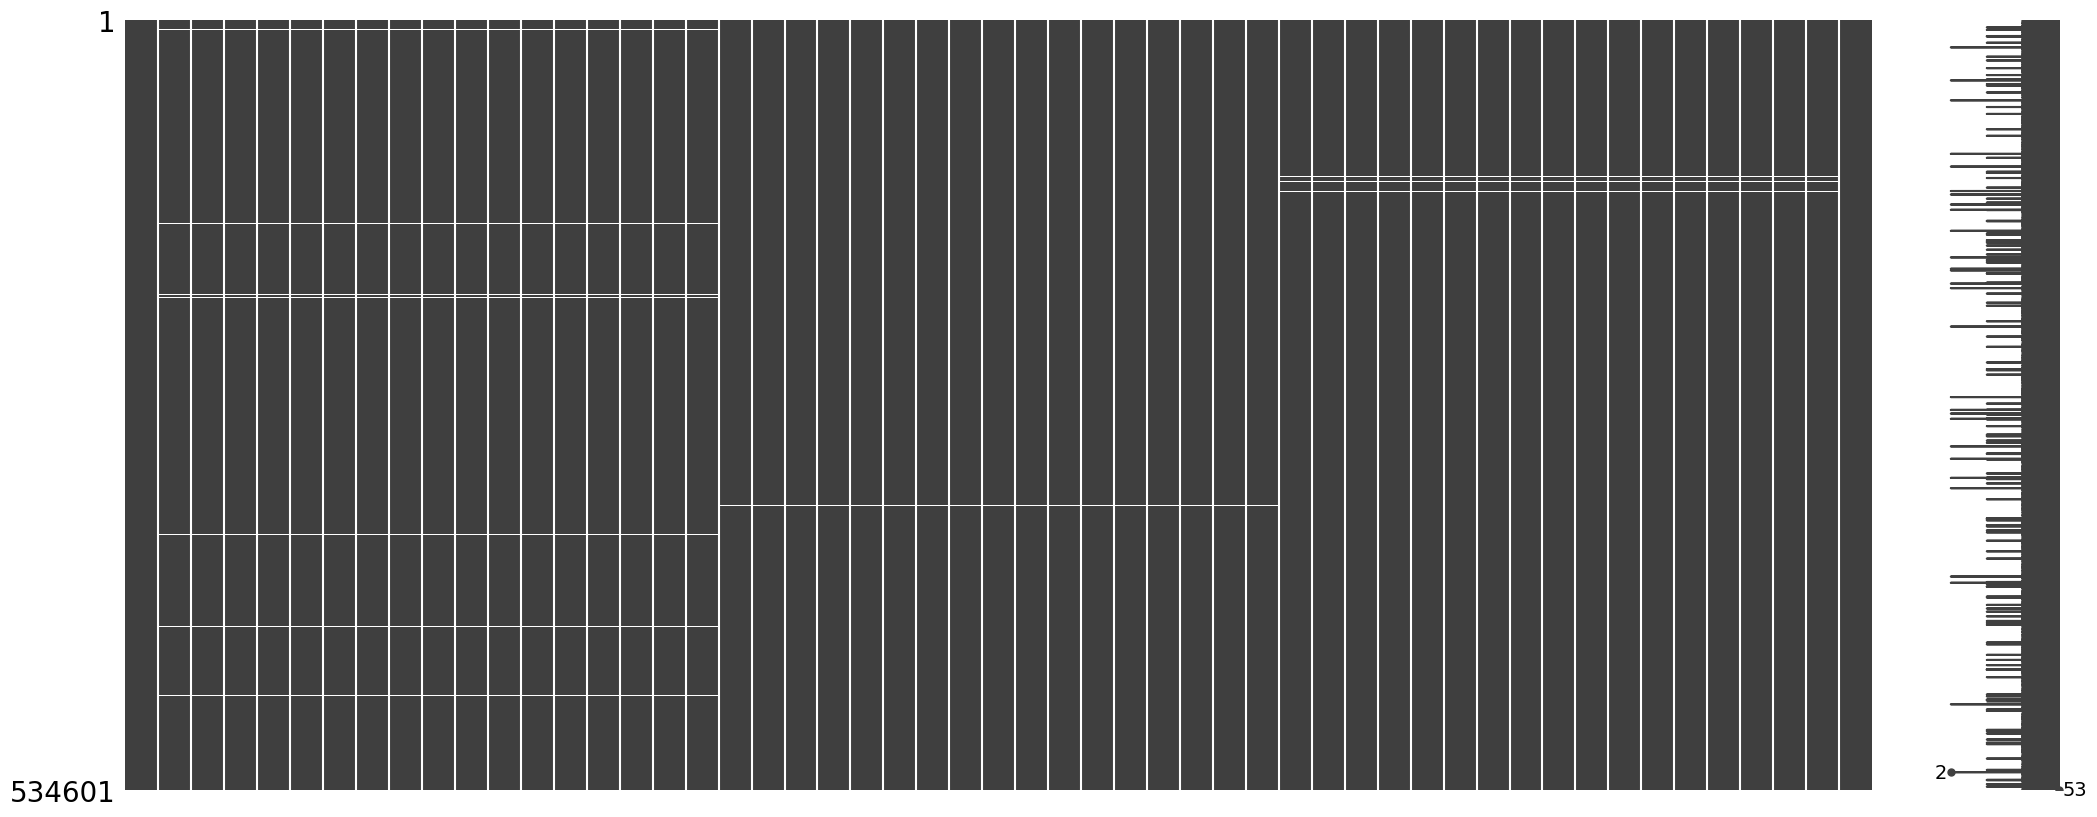

In [10]:
msno.matrix(df)

<AxesSubplot:>

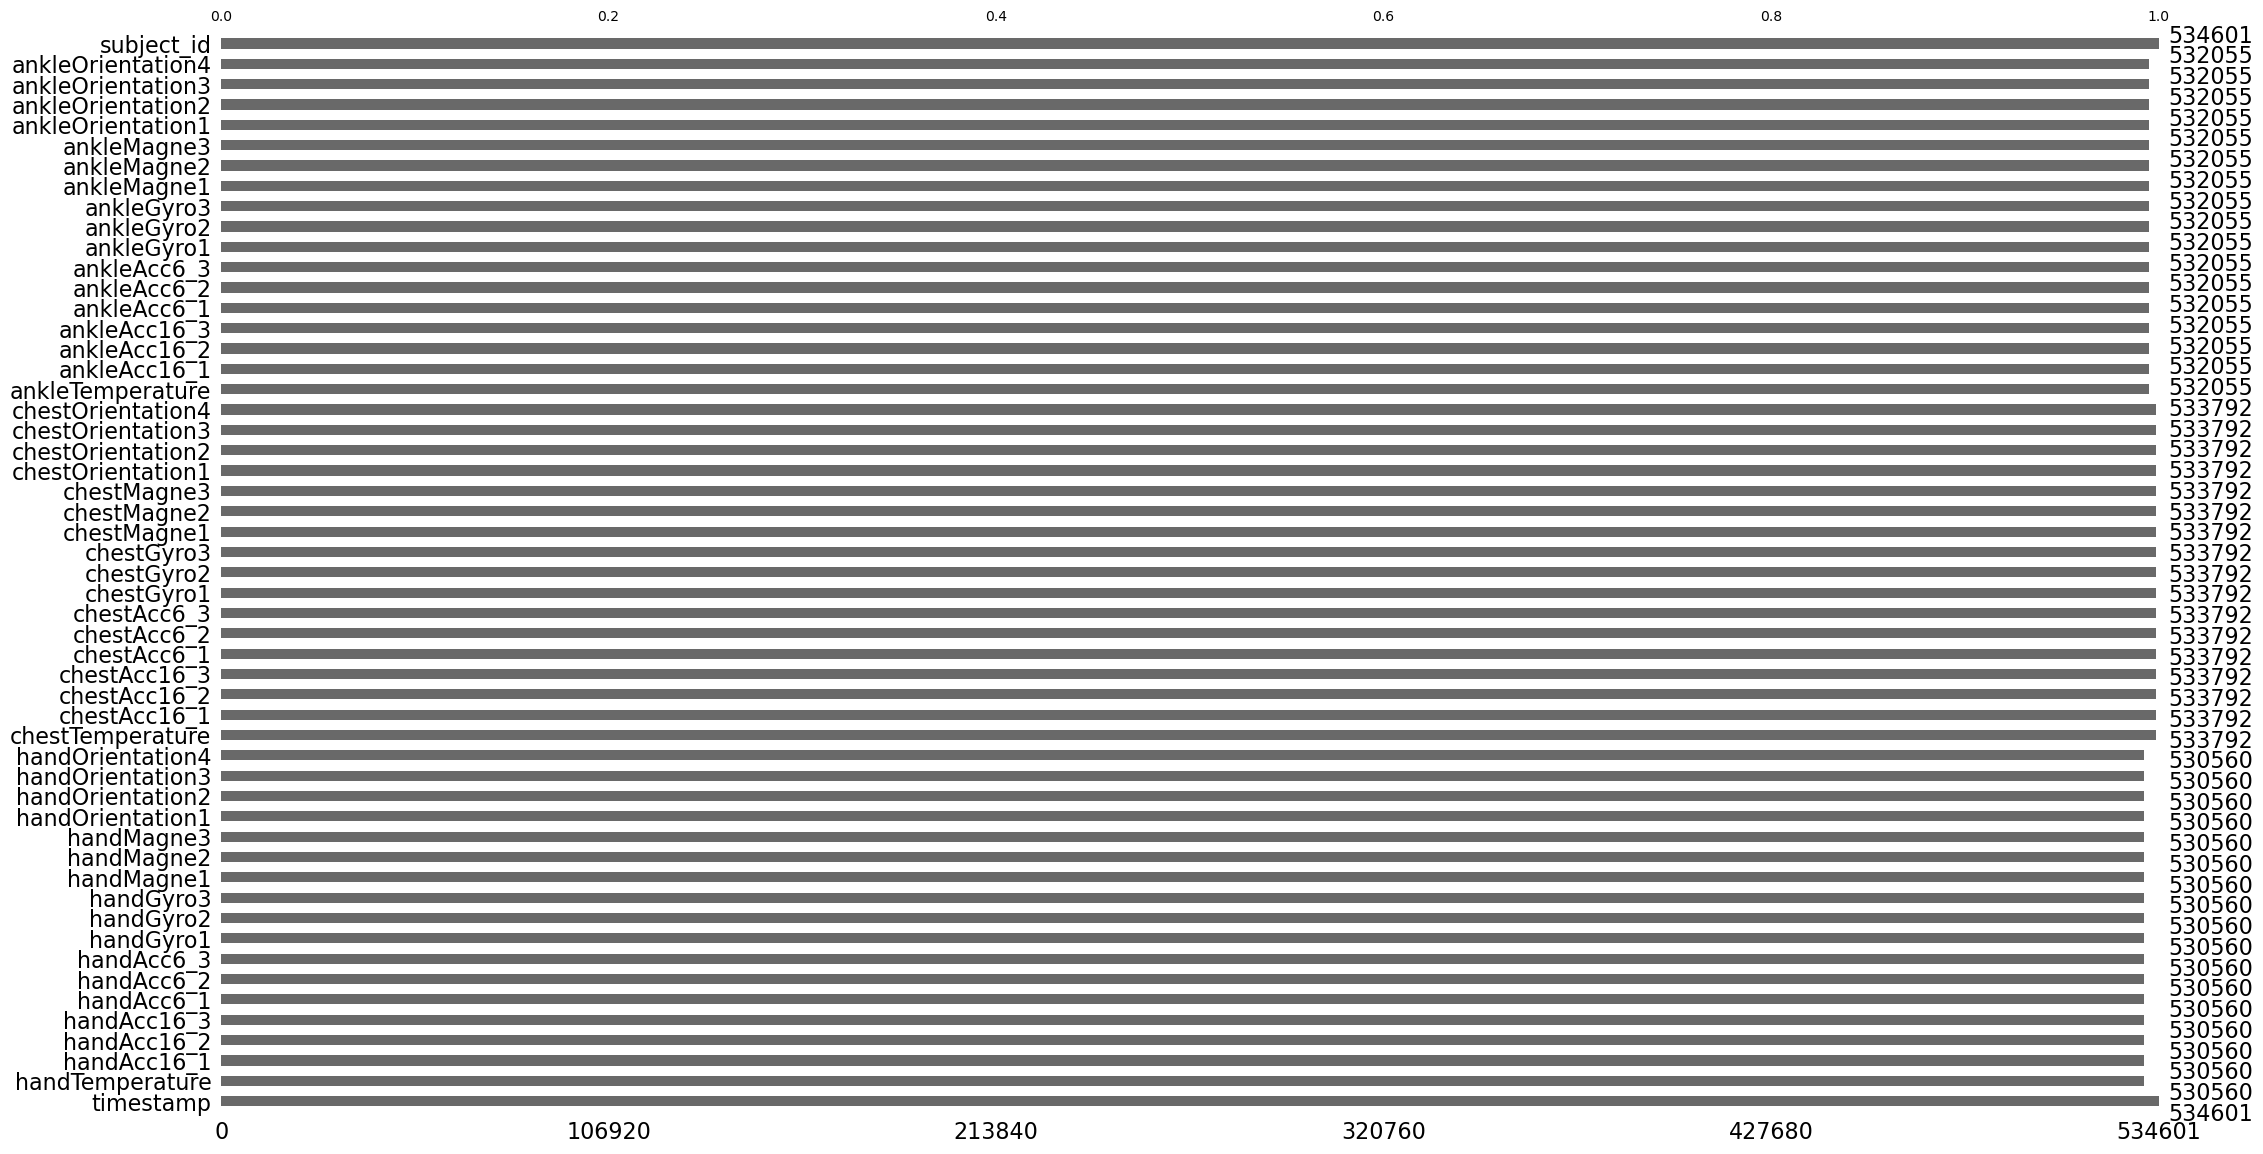

In [11]:
msno.bar(df)

**Ка видим в данных у нас имеются множество пропущенных значений.**

Так как датасет собран из реальных данных, то в жизни случается всякое.

Пустые значения в данном случае могут быть обусловлены следующими факторами:
* Потеря данных из-за использования беспроводных датчиков.
* Проблемы с настройкой оборудования, вызывающие, например. потерю соединения с датчиками или системный сбой.

Существуют две основные стратегии при работе с пропусками:
1. Удаление пропущенных значений
2. Заполнение пропусков

**Удаление.**

При удалении пропусков можно:
1. Удалять как целиком какой-то признак (например, если больше 70% для этого признака это пропуски, тогда мы можем целиком удалить данный столбец):
`df.drop(columns='name'])`

2. Удалить можно объекты у которых имеются пропущенные значения, т.е. в данном случае мы удаляем строки. *Но будьте внимательны так как удалять из тестового набора данных не всегда возможно, иначе размерность ответов не совпадет.*
`df.dropna()`

In [12]:
# В качестве примера удалим из набора данных признаки, пропуски в которых превыщают 4 000
df.drop(columns=['handTemperature', 'handAcc16_1', 'handAcc16_2', 'handAcc16_3', 'handAcc16_3', 'handAcc6_1', 'handAcc6_2', 'handAcc6_3',
                 'handGyro1', 'handGyro2', 'handGyro3', 'handMagne1', 'handMagne2', 'handMagne3', 'handOrientation1', 'handOrientation2',
                 'handOrientation3', 'handOrientation4'], inplace=True)
df.isna().sum() 

timestamp               0
chestTemperature      809
chestAcc16_1          809
chestAcc16_2          809
chestAcc16_3          809
chestAcc6_1           809
chestAcc6_2           809
chestAcc6_3           809
chestGyro1            809
chestGyro2            809
chestGyro3            809
chestMagne1           809
chestMagne2           809
chestMagne3           809
chestOrientation1     809
chestOrientation2     809
chestOrientation3     809
chestOrientation4     809
ankleTemperature     2546
ankleAcc16_1         2546
ankleAcc16_2         2546
ankleAcc16_3         2546
ankleAcc6_1          2546
ankleAcc6_2          2546
ankleAcc6_3          2546
ankleGyro1           2546
ankleGyro2           2546
ankleGyro3           2546
ankleMagne1          2546
ankleMagne2          2546
ankleMagne3          2546
ankleOrientation1    2546
ankleOrientation2    2546
ankleOrientation3    2546
ankleOrientation4    2546
subject_id              0
dtype: int64

**Заполнение.**

При заполнении пропусков также существует множество различных стратегий:
- заполнение пропусков с помощью **среднего/медианы/максимума/минимум** по данному признаку.
- при категориальных признаках пропуски можно заполнить пропущенные значения с помощью наиболее часто встречающейся категории по данному признаку (**модой**).
- используя **интерполяцию** - нахождение неизвестных промежуточных значений некоторой функции, по имеющемуся дискретному набору её известных значений, определенным способом. 
- используя различные **другие алгоритмы машинного обучения** для заполнения пропусков (представьте, что все строки с пропусками - это тестовый набор данных, для которого вам нужно вернуть ответ).

Табличка в помощь:
https://help.loginom.ru/userguide/processors/preprocessing/imputation.html

In [13]:
df.columns

Index(['timestamp', 'chestTemperature', 'chestAcc16_1', 'chestAcc16_2',
       'chestAcc16_3', 'chestAcc6_1', 'chestAcc6_2', 'chestAcc6_3',
       'chestGyro1', 'chestGyro2', 'chestGyro3', 'chestMagne1', 'chestMagne2',
       'chestMagne3', 'chestOrientation1', 'chestOrientation2',
       'chestOrientation3', 'chestOrientation4', 'ankleTemperature',
       'ankleAcc16_1', 'ankleAcc16_2', 'ankleAcc16_3', 'ankleAcc6_1',
       'ankleAcc6_2', 'ankleAcc6_3', 'ankleGyro1', 'ankleGyro2', 'ankleGyro3',
       'ankleMagne1', 'ankleMagne2', 'ankleMagne3', 'ankleOrientation1',
       'ankleOrientation2', 'ankleOrientation3', 'ankleOrientation4',
       'subject_id'],
      dtype='object')

In [14]:
# Заполним пропуски с помощью среднего значения

col_missing = ['chestTemperature', 'chestAcc16_1', 'chestAcc16_2', 'chestAcc16_3', 'chestAcc6_1', 'chestAcc6_2',
               'chestAcc6_3', 'chestGyro1', 'chestGyro2', 'chestGyro3', 'chestMagne1',
               'chestMagne2', 'chestMagne3', 'chestOrientation1', 'chestOrientation2',
               'chestOrientation3', 'chestOrientation4', 'ankleTemperature',
               'ankleAcc16_1', 'ankleAcc16_2', 'ankleAcc16_3', 'ankleAcc6_1',
               'ankleAcc6_2', 'ankleAcc6_3', 'ankleGyro1', 'ankleGyro2', 'ankleGyro3',
               'ankleMagne1', 'ankleMagne2', 'ankleMagne3', 'ankleOrientation1',
               'ankleOrientation2', 'ankleOrientation3', 'ankleOrientation4']

for i in col_missing:
    df[i].fillna(df[i].mean(), inplace=True)

df.isna().sum()

timestamp            0
chestTemperature     0
chestAcc16_1         0
chestAcc16_2         0
chestAcc16_3         0
chestAcc6_1          0
chestAcc6_2          0
chestAcc6_3          0
chestGyro1           0
chestGyro2           0
chestGyro3           0
chestMagne1          0
chestMagne2          0
chestMagne3          0
chestOrientation1    0
chestOrientation2    0
chestOrientation3    0
chestOrientation4    0
ankleTemperature     0
ankleAcc16_1         0
ankleAcc16_2         0
ankleAcc16_3         0
ankleAcc6_1          0
ankleAcc6_2          0
ankleAcc6_3          0
ankleGyro1           0
ankleGyro2           0
ankleGyro3           0
ankleMagne1          0
ankleMagne2          0
ankleMagne3          0
ankleOrientation1    0
ankleOrientation2    0
ankleOrientation3    0
ankleOrientation4    0
subject_id           0
dtype: int64

In [15]:
df = df.drop(columns=['timestamp'])

In [16]:
df.isna().sum()

chestTemperature     0
chestAcc16_1         0
chestAcc16_2         0
chestAcc16_3         0
chestAcc6_1          0
chestAcc6_2          0
chestAcc6_3          0
chestGyro1           0
chestGyro2           0
chestGyro3           0
chestMagne1          0
chestMagne2          0
chestMagne3          0
chestOrientation1    0
chestOrientation2    0
chestOrientation3    0
chestOrientation4    0
ankleTemperature     0
ankleAcc16_1         0
ankleAcc16_2         0
ankleAcc16_3         0
ankleAcc6_1          0
ankleAcc6_2          0
ankleAcc6_3          0
ankleGyro1           0
ankleGyro2           0
ankleGyro3           0
ankleMagne1          0
ankleMagne2          0
ankleMagne3          0
ankleOrientation1    0
ankleOrientation2    0
ankleOrientation3    0
ankleOrientation4    0
subject_id           0
dtype: int64

## Кластеризация

Для кластеризации в данном примере мы будем использовать **KMeans**.

In [30]:
%%time
from sklearn.cluster import KMeans

n_clusters = 6

clusterer = KMeans(n_clusters=n_clusters)

cluster_labels = clusterer.fit_predict(df)

# inertia
inertia = clusterer.inertia_

Wall time: 14.4 s


In [31]:
print("For n_clusters =", n_clusters,
      ", the inertia is :", inertia)

For n_clusters = 6 , the inertia is : 600330961.8217343


In [19]:
#%%time
#from sklearn.metrics import silhouette_score

#silhouette_avg = silhouette_score(df, cluster_labels)

**Как оценить качество получившегося кластерного разбиения?**

**Коэффициент Силуэтта**

К-т Силуэтта (англ *Silhouette*) - это метрика, которая не предполагает знания истинных меток объектов, и позволяет оценить качество кластеризации, используя только саму (неразмеченную) выборку и результат кластеризации.

Интуитивное описание метрики:
* точки внутри кластера должны лежать очень близко друг к другу, то есть кластер должен быть *плотным*
* сами кластера должны лежать как можно дальше друг от друга

Метрика силуэта позволяет учитывать оба этих факта в одной формуле.

Чтобы вычислить его для каждого объекта нужно вычислить для каждого объекта выборки две величины, $a$ (среднее расстояние от данного объекта до объектов из того же кластера) и $b$ (среднее расстояние от данного объекта до объектов из ближайшего кластера (отличного от того, в котором лежит сам объект)). 

Силуэтом объекта назовём нормализованную разность между этими величинами

$$
s = \frac{b-a}{\max(a,b)}
$$

Силуэтом выборки называется средняя величина силуэта объектов данной выборки. Таким образом, силуэт показывает, насколько среднее расстояние до объектов своего кластера отличается от среднего расстояния до объектов других кластеров. Эта величина меняется в интервале от $-1$ до $1$:

* -1 значит что кластера плохие, размытые
* 0 значит что кластера накладываются друг на друга
* 1 значит что кластера плотные и хорошо отделены друг от друга

Таким образом, чем ближе значение к-та Силуэтта в единице, тем лучше. Все, что больше $0.5$ хорошие значения, всё что меньше - надо улучшать.

Формулу реализовывать не надо, она уже есть в *sklearn*. Для примера загрузим наш датасет с кластеризацией:

**Инерция**

Инерция показывает, насколько когерентны различные кластеры.

Вычисляется по следующей формуле:

$inertia = \sum_{i=1}^N (x_i - C_k)$

* N — количество выборок в наборе данных
* C — центр кластера. 

Таким образом, Inertia просто вычисляет квадрат расстояния от каждой выборки в кластере до его центра кластера и суммирует их. Этот процесс выполняется для каждого кластера и всех выборок в этом наборе данных. Чем меньше значение Inertia, тем более когерентны различные кластеры. Когда добавляется столько кластеров, сколько имеется выборок в наборе данных, значение инерции будет равно нулю. 

In [32]:
import numpy as np

len(np.unique(cluster_labels))

6

## Оптимальное количество кластеров

**В данном примере, мы выбрали рандомное число кластеров. И тут встает вопрос как подобрать оптимальное и подходящее количество кластеров для датасета?**

https://habr.com/ru/company/jetinfosystems/blog/467745/

Собственно используя коэффицент Силуэта и инерцию, можно додобрать оптимальное количество кластеров, а также гиперпараметры для KMeans.

**Существует несколько различных стратегий подбора оптимального количества кластеров:**
1. Метод локтя
2. Gap-Statistics (https://towardsdatascience.com/k-means-clustering-and-the-gap-statistics-4c5d414acd29)
3. Метод силуэтов https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

### Метод локтя

**Метод локтя** – один из самых известных методов, с помощью которого вы можете выбрать правильное значение k и повысить производительность Модели (Model). Этот эмпирический метод вычисляет сумму квадратов расстояний между точками и вычисляет Среднее значение (Mean).

**Метод "локтя" (elbow method)** рассматривает характер изменения разброса  $W_{total}$  с увеличением числа групп  $k$ . Объединив все {n} наблюдений в одну группу, мы имеем наибольшую внутрикластерную дисперсию, которая будет снижаться до 0 при  $k→n$ . На каком-то этапе можно усмотреть, что снижение этой дисперсии замедляется - на графике это происходит в точке, называемой "локтем". Построить такой график можно в результате прямого перебора.

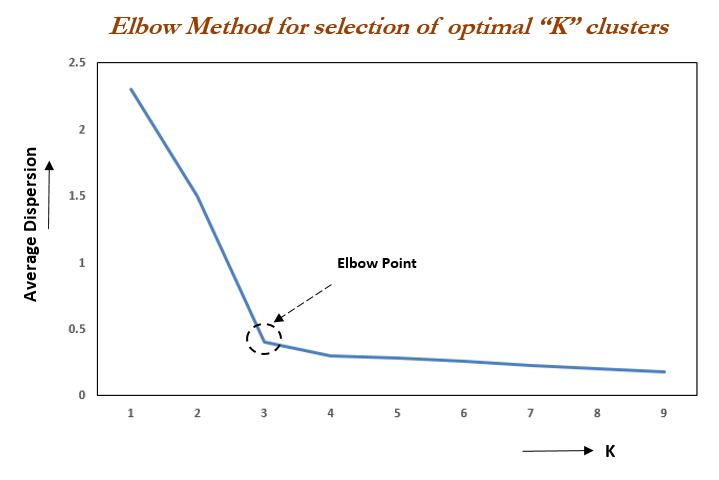

In [21]:
%%time

inertia_df = pd.DataFrame(data=[], index=range(3, 12), columns=['inertia'])
                                                             
for n_clusters in range(3, 12):
    clusterer = KMeans(n_clusters=n_clusters,  random_state=42)
    cluster_labels = clusterer.fit_predict(df)
    
    # inertia
    inertia_df.loc[n_clusters] = clusterer.inertia_  

Wall time: 3min 16s


<AxesSubplot:>

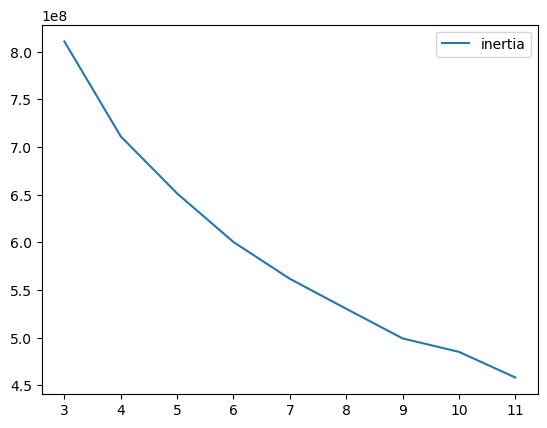

In [22]:
inertia_df.plot()

In [33]:
cluster_labels

array([2, 3, 4, ..., 0, 1, 4])

## Подготовка ответов

In [34]:
predictions = pd.DataFrame(cluster_labels, columns=['activityID'])
predictions = predictions.reset_index()

predictions

,index,activityID
0,0,2
1,1,3
2,2,4
3,3,0
4,4,4
...,...,...
534596,534596,4
534597,534597,0
534598,534598,0
534599,534599,1


In [35]:
predictions['activityID'].unique()

array([2, 3, 4, 0, 1, 5])

**Пример того как преобразовать номера кластеров.**

In [36]:
import numpy as np

one = 2
two = 3
three = 4
four = 0
five = 1
six = 5

predictions['new'] = np.where(predictions['activityID'] == one, 1,
                      np.where(predictions['activityID'] == two, 2,
                               np.where(predictions['activityID'] == three, 3,
                                        np.where(predictions['activityID'] == four, 4,
                                                 np.where(predictions['activityID'] == five, 5,
                                                          np.where(predictions['activityID'] == six, 6, -1))))))
predictions['new'].value_counts()

3    143868
4    105759
5     97920
1     87672
2     77280
6     22102
Name: new, dtype: int64

In [37]:
predictions.to_csv("solution.csv", index=False)